### Importing Libraries Used

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
from statsmodels.stats.outliers_influence import variance_inflation_factor
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Reading Dataset

In [3]:
data=pd.read_csv('concrete_data.csv')
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### Summary Statistics and Dataframe Properties

In [4]:
print(data.dtypes)

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object


In [5]:
print(data.columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


In [6]:
print(data.shape)

(1030, 9)


In [7]:
print(data.describe())

            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.

In [8]:
def changeunit(x):
    return x/1000

In [9]:
data['Water']=data['Water'].apply(changeunit)

### Checking for Null Values

In [10]:
print(data.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


In [11]:
print(data.isna().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag'}>,
        <AxesSubplot:title={'center':'Fly Ash'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

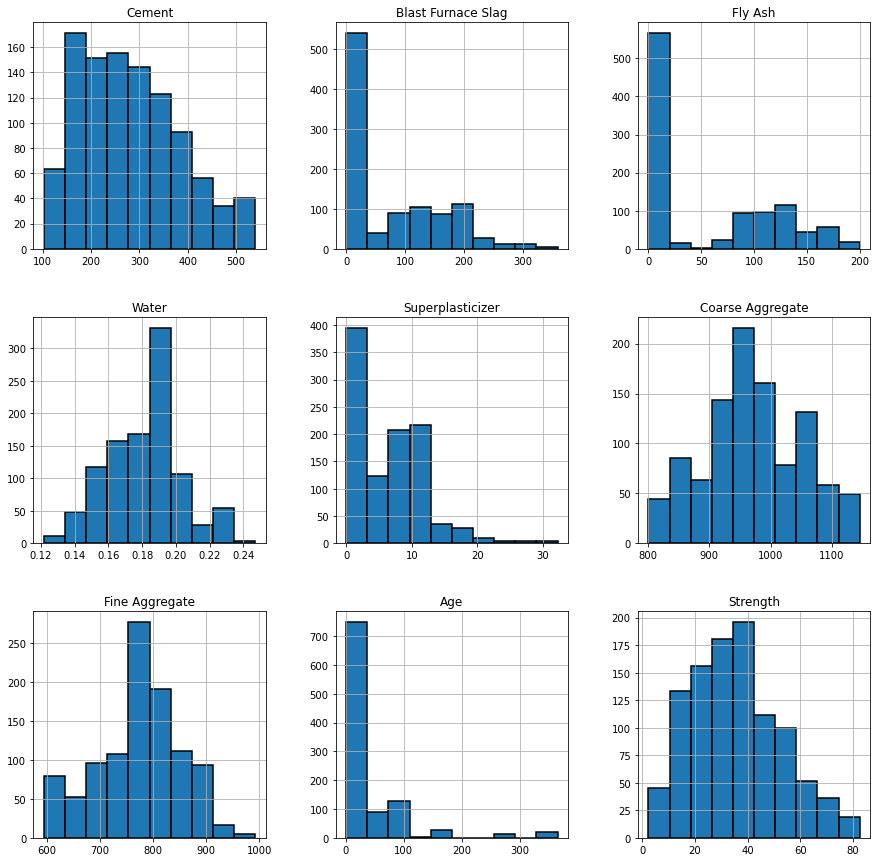

In [12]:
data.hist(figsize=(15,15),linewidth=1.5,edgecolor='black')

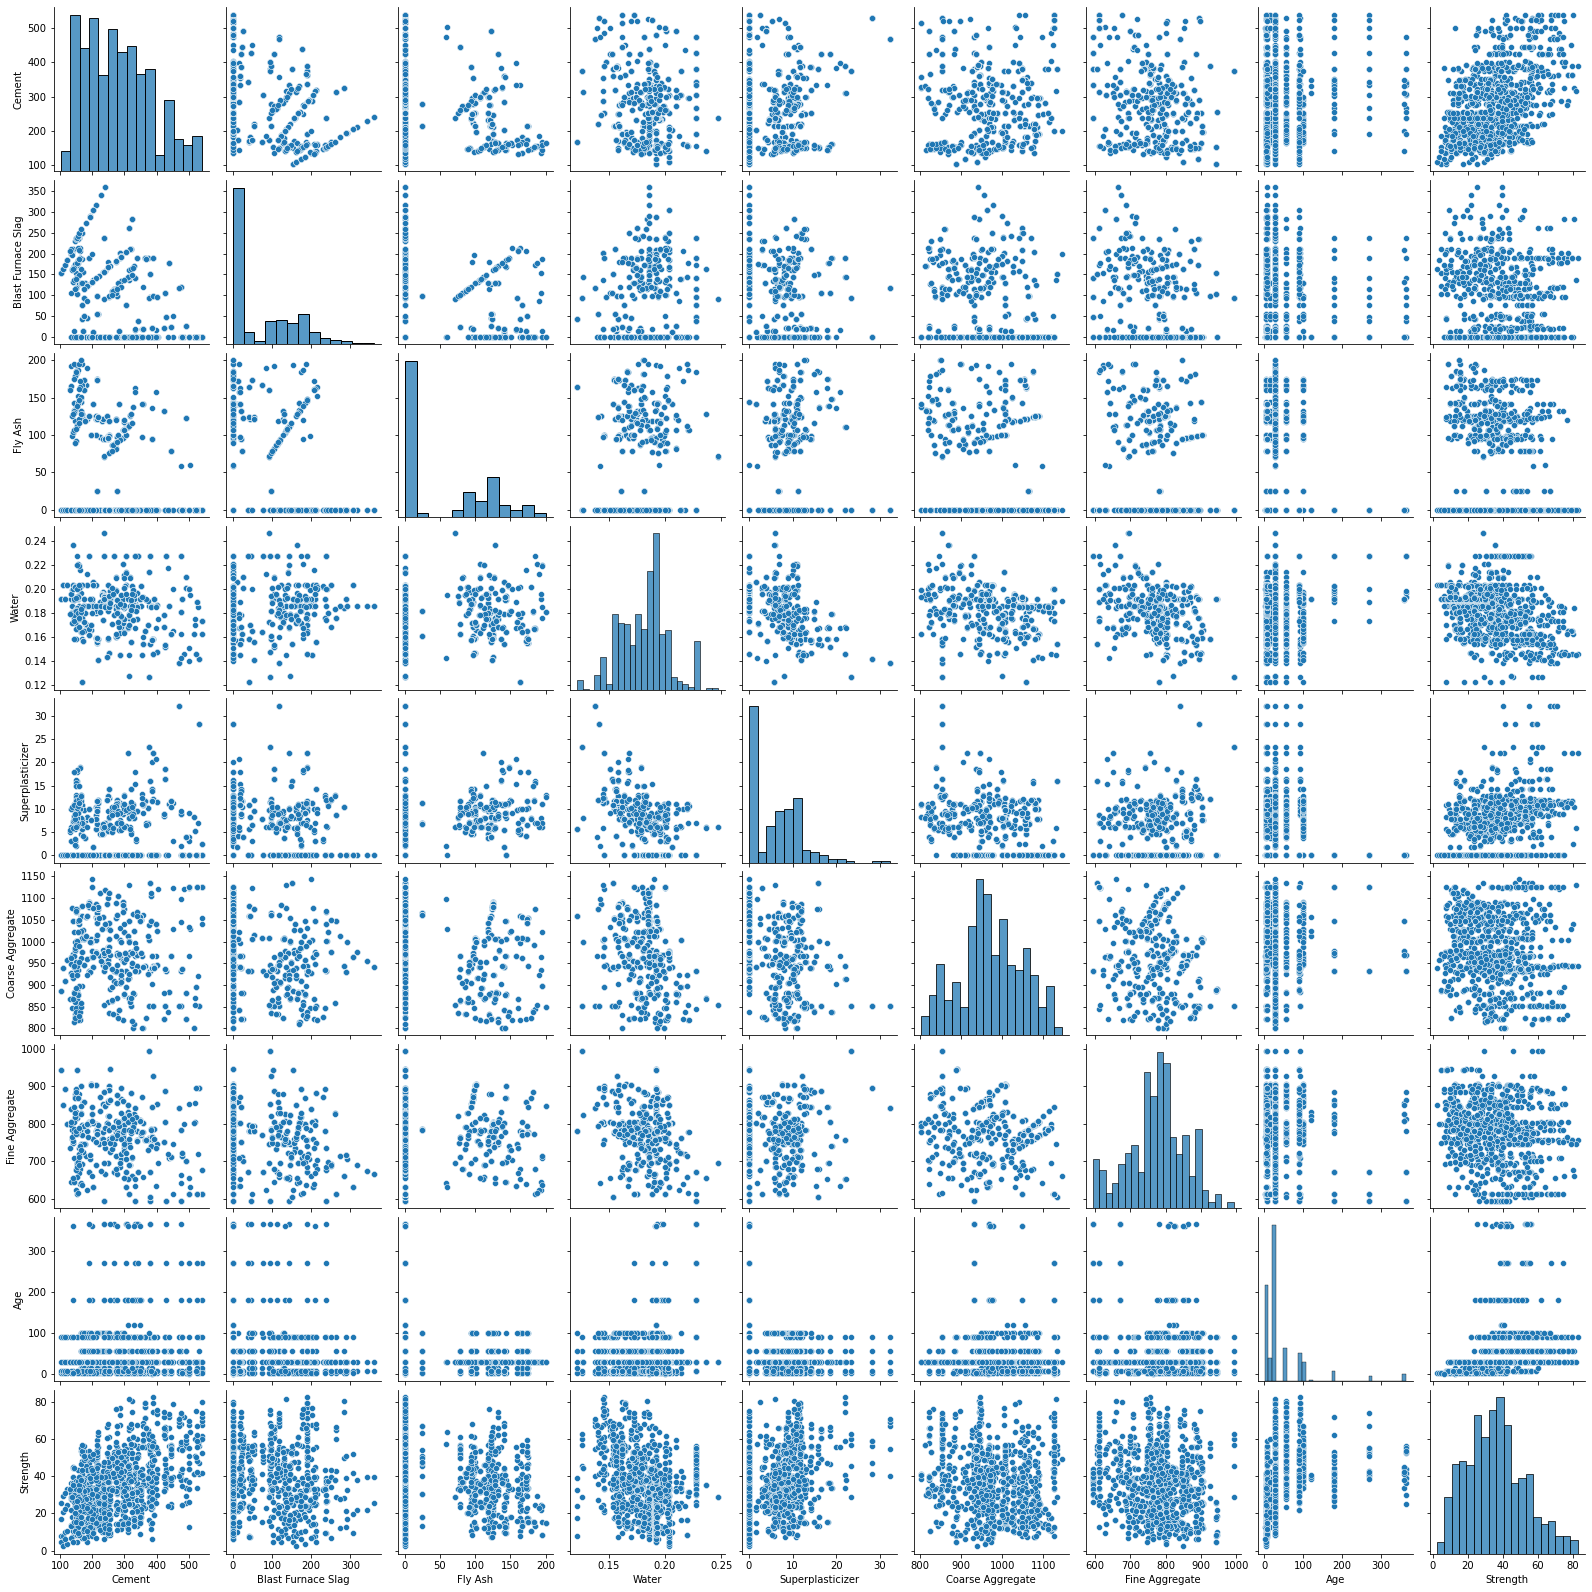

In [13]:
sns.pairplot(data)

In [14]:
cor=data.corr()
print(cor)

                      Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275216 -0.397467 -0.081587   
Blast Furnace Slag -0.275216            1.000000 -0.323580  0.107252   
Fly Ash            -0.397467           -0.323580  1.000000 -0.256984   
Water              -0.081587            0.107252 -0.256984  1.000000   
Superplasticizer    0.092386            0.043270  0.377503 -0.657533   
Coarse Aggregate   -0.109349           -0.283999 -0.009961 -0.182294   
Fine Aggregate     -0.222718           -0.281603  0.079108 -0.450661   
Age                 0.081946           -0.044246 -0.154371  0.277618   
Strength            0.497832            0.134829 -0.105755 -0.289633   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092386         -0.109349       -0.222718   
Blast Furnace Slag          0.043270         -0.283999       -0.281603   
Fly Ash                     0.377503         -0.009961   

<AxesSubplot:>

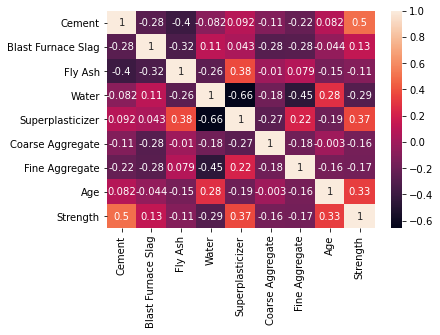

In [15]:
sns.heatmap(cor,annot=True)

In [16]:
z_scores = sci.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data1 = data[filtered_entries]

Text(0.5, 1.0, 'Correlation between each variable and Strength \n')

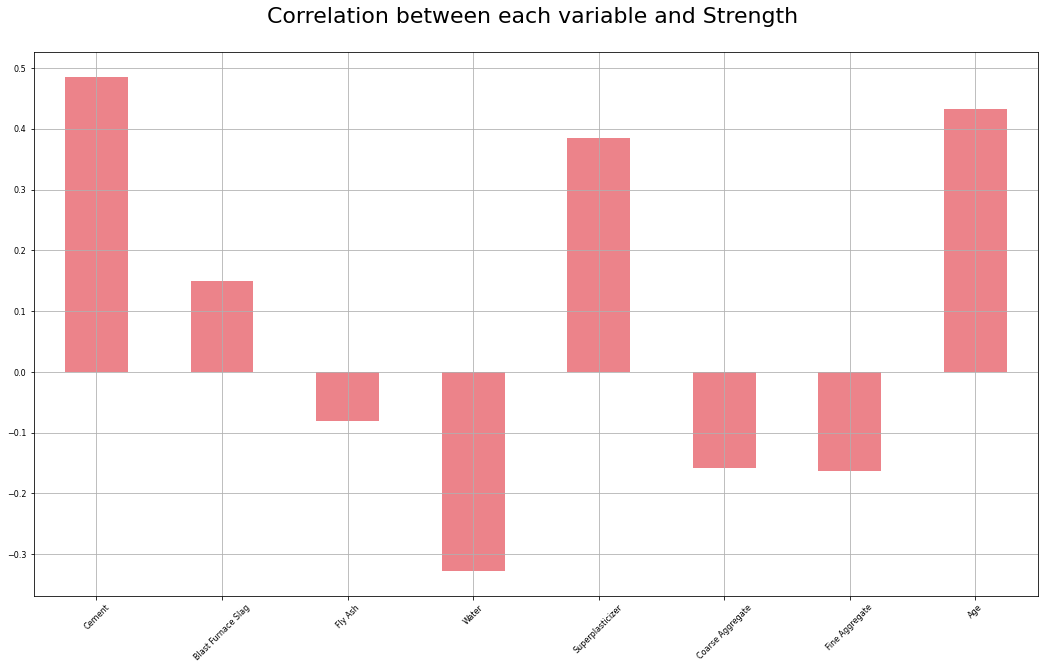

In [17]:
data2=data1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]
correlations = data2.corrwith(data1['Strength'])
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation between each variable and Strength \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [18]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

In [19]:
calc_vif(data2)

,variables,VIF
0,Cement,14.935715
1,Blast Furnace Slag,3.504498
2,Fly Ash,4.612332
3,Water,86.648195
4,Superplasticizer,6.095856
5,Coarse Aggregate,83.624360
6,Fine Aggregate,73.752958
7,Age,2.022344


In [20]:
data1=data1.drop('Coarse Aggregate',axis=1)

In [21]:
calc_vif(data1)

,variables,VIF
0,Cement,28.806798
1,Blast Furnace Slag,4.951287
2,Fly Ash,5.009540
3,Water,86.011769
4,Superplasticizer,6.157674
5,Fine Aggregate,53.399544
6,Age,3.610057
7,Strength,18.346979


In [22]:
data1=data1.drop('Fine Aggregate',axis=1)

In [23]:
calc_vif(data1)

,variables,VIF
0,Cement,27.386356
1,Blast Furnace Slag,4.357462
2,Fly Ash,4.760375
3,Water,25.385476
4,Superplasticizer,4.615130
5,Age,3.552789
6,Strength,17.816856


In [24]:
data1_columns = data1.columns

predictors = data1[data1_columns[data1_columns != 'Strength']] # all columns except Strength
target = data1['Strength']

In [25]:
n_cols = predictors.shape[1]

### Let's Define the regression model
*Network Properties:
-Hidden Layer: 1
-Nodes: 10
-Activation Function: ReLU
-Optimizer: Adam
-Loss Function: Mean Squared Error
-Epochs: 50

In [26]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [28]:
mse = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

    # build the model
    model = regression_model()

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse.append(mean_squared_error(y_test, y_pred))

In [29]:
print('number of iterations: {:.2f}'.format(len(mse)))
mse

number of iterations: 50.00


[186.20208396897365,
 118.84355906585377,
 94.68931638718368,
 135.9342717363313,
 106.71751509479056,
 93.44930717751045,
 72.98894116945552,
 75.45950816470058,
 86.15437426738359,
 94.89063526257064,
 95.90586682342507,
 128.01641003248653,
 98.69514098881463,
 95.49950755391741,
 119.82688138640256,
 95.04910811512325,
 64.70613306594659,
 88.20932610397531,
 70.64018178974924,
 118.96685204162443,
 104.65602273277477,
 100.314918692623,
 118.64228401706944,
 87.98183157250627,
 76.24971774048134,
 108.2459528927479,
 97.05226983986894,
 171.83550744726742,
 100.78791054157512,
 114.58471188100926,
 117.01378344042277,
 89.0843789448813,
 92.81505731676985,
 67.03579887444592,
 67.09160183729657,
 100.72316041816059,
 91.1874438619116,
 97.60806120804655,
 124.00028315013068,
 110.01302657783708,
 80.09018914730491,
 126.35626975643413,
 75.9068042633065,
 107.13988138523753,
 120.8525123952905,
 95.48152229387571,
 101.31113994957347,
 82.0997196027644,
 72.1750207225781,
 94.9009

In [30]:
print('mse_Mean: {:.2f}'.format(np.mean(mse)))
print('mse_StdDev: {:.2f}'.format(np.std(mse)))

mse_Mean: 100.68
mse_StdDev: 23.57


### Let's Define the regression model
*Network Properties:
-Hidden Layer: 1
-Nodes: 10
-Activation Function: ReLU
-Optimizer: Adam
-Loss Function: Mean Squared Error
-Epochs: 100

In [43]:
mse2 = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

    # build the model
    model = regression_model()

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse2.append(mean_squared_error(y_test, y_pred))

In [44]:
print('number of iterations: {:.2f}'.format(len(mse2)))
mse2

number of iterations: 50.00


[64.341912736563,
 70.45095171282996,
 97.80611392043156,
 107.76698443567172,
 64.006260955375,
 84.01083751684538,
 96.32488643660548,
 92.34313563534704,
 71.79612129194967,
 83.8952916604814,
 76.56646665998231,
 75.55074944188493,
 64.77230188633571,
 100.58944963247095,
 85.27031654609823,
 63.23367759427625,
 65.27038417224863,
 62.08239580065019,
 72.50845012669481,
 62.381353701997824,
 69.94646675521311,
 78.36086011535386,
 84.25685880687854,
 111.12829448408998,
 84.54263088339627,
 102.28089536873762,
 67.19266360474457,
 76.13376439151764,
 100.60589445742319,
 67.49441981318617,
 98.80444897496884,
 89.65525084640299,
 76.86412653577905,
 69.37901598449858,
 71.60584966153748,
 112.00639848064668,
 76.6934930599512,
 75.16129266262644,
 76.5724863707506,
 101.58075679187326,
 107.2829924739491,
 63.27370315678245,
 65.30955788083529,
 61.31177531426471,
 115.99748843952636,
 82.76578468630679,
 73.49054033101321,
 75.89110862792657,
 77.52050937066272,
 72.59053753936928

In [62]:
print('rmse_Mean: {:.2f}'.format(np.sqrt(np.mean(mse2))))
print('mse_StdDev: {:.2f}'.format(np.std(mse2)))

rmse_Mean: 9.00
mse_StdDev: 15.24


## normalization and same model with 50 iterations

In [31]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()

In [36]:
mse1 = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

    # build the model
    model = regression_model()

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse1.append(mean_squared_error(y_test, y_pred))

In [38]:
print('number of iterations: {:.2f}'.format(len(mse1)))
mse1

number of iterations: 50.00


[341.5495692613699,
 300.2124620930065,
 424.80796684887076,
 374.32419740845717,
 417.5122808004274,
 275.8246316984929,
 267.23635974337657,
 324.9685750066024,
 482.85904356509946,
 209.01878265840267,
 334.5958748095984,
 307.0757532958804,
 298.8087066209094,
 669.4380480069095,
 449.2837340795074,
 850.3935988377083,
 316.20836407674045,
 294.8755707725636,
 318.5946985704018,
 262.2645365827145,
 495.0287097498018,
 488.5431324902825,
 357.66426661246885,
 401.1101853838708,
 405.9349406907822,
 328.1299408363627,
 379.40689252180005,
 384.86352288714875,
 336.6350740544555,
 635.8592154166982,
 321.4970691052883,
 328.1208401879347,
 345.53393069119136,
 305.42565669339496,
 551.2130833932828,
 284.0473302391449,
 320.212669447018,
 507.6652617355477,
 300.72785915646426,
 302.2730957861662,
 281.3583147934961,
 336.21347019573165,
 296.04146164056846,
 207.1648442615841,
 324.0428099051984,
 292.9533290676089,
 267.3759030376487,
 409.9577426116028,
 673.2802382357887,
 376.01

In [39]:
print('mse_Mean: {:.2f}'.format(np.mean(mse1)))
print('mse_StdDev: {:.2f}'.format(np.std(mse1)))

mse_Mean: 375.28
mse_StdDev: 123.98


## With 3 layers

In [53]:
def regression_model3():
    # create model
    model3 = Sequential()
    model3.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model3.add(Dense(10, activation='relu'))
    model3.add(Dense(10, activation='relu'))
    model3.add(Dense(1))
    
    # compile model
    model3.compile(optimizer='adam', loss='mean_squared_error')
    return model3

In [54]:
mse3 = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3)

    # build the model
    model_layer3 = regression_model3()

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model_layer3.predict(X_test)
    
    mse3.append(mean_squared_error(y_test, y_pred))

In [55]:
print('number of iterations: {:.2f}'.format(len(mse3)))
mse3

number of iterations: 50.00


[1433.451266858115,
 1576.9990998385103,
 1502.7390692894085,
 1530.6680912673655,
 1630.3775472652765,
 1555.3476146593437,
 1541.888489524262,
 1496.635305188056,
 1568.2735834553475,
 1470.6091103104336,
 1356.2111974634374,
 1524.2161476741696,
 1503.4370566161465,
 1542.0103539025204,
 1489.7456101642529,
 1338.167188139487,
 1507.87332766005,
 1545.3720065424113,
 1469.5524921546823,
 1632.2133626530622,
 1500.496194073579,
 1442.806638753295,
 1526.32936157747,
 1544.7759066953477,
 1447.6709896291832,
 1559.1843363411133,
 1620.149915732726,
 1641.840978922058,
 1433.8477272252987,
 1569.675756801226,
 1550.4990437202302,
 1454.504517601147,
 1491.5162483974761,
 1442.5154608817024,
 1589.2588998130768,
 1599.0328221876157,
 1584.3235945435842,
 1449.6888980683116,
 1532.8805628115713,
 1676.7384982875774,
 1514.2349371278744,
 1495.235532720551,
 1387.6392904982288,
 1577.7192137540997,
 1624.7718206142893,
 1579.1897776797277,
 1502.1452306647484,
 1429.7802763831103,
 1491.7

In [61]:
print('rmse_Mean: {:.2f}'.format(np.sqrt(np.mean(mse))))
print('mse_StdDev: {:.2f}'.format(np.std(mse)))

rmse_Mean: 18.76
mse_StdDev: 93.55
